# 데이터 시각화

In [ ]:
import os
import pandas as pd
import numpy as np
from plt_rce import *

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../../data')

In [ ]:
sorted(os.listdir())

In [ ]:
apt = pd.read_csv(
    'APT_Data_Prep.csv',
    parse_dates=['계약일자'],
    low_memory=False
)

In [ ]:
apt.head()

In [ ]:
apt.info()

In [ ]:
apt.describe(include=[int, float]).round(2)

In [ ]:
apt.describe(include=object)

## matplotlib & seaborn

- 시각화 코드는 하나의 셀에 여러 줄을 입력
- 맨 마지막 코드 오른쪽 끝에 세미콜론을 추가하면 그래프만 출력
    - 또는 맨 마지막 줄에 plt.show() 추가

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### 원하는 폰트 리스트 확인

In [173]:
font_list = fm.findSystemFonts(fontext='ttf')
font_path = [font for font in font_list if 'Gowun' in font]
font_path
# ['/Users/taehyunan/Library/Fonts/GowunBatang-Bold.ttf',
#  '/Users/taehyunan/Library/Fonts/GowunBatang-Regular.ttf',
#  '/Users/taehyunan/Library/Fonts/GowunDodum-Regular.ttf']

['/Users/taehyunan/Library/Fonts/GowunDodum-Regular.ttf',
 '/Users/taehyunan/Library/Fonts/GowunBatang-Bold.ttf',
 '/Users/taehyunan/Library/Fonts/GowunBatang-Regular.ttf']

### 폰트가 설치되어 있는 이름 확인

In [ ]:
for font in font_path:
    print(fm.FontProperties(fname=font).get_name())
# Gowun Dodum
# Gowun Batang
# Gowun Batang

Gowun Dodum
Gowun Batang
Gowun Batang


### matplotlib 캐시 삭제

In [ ]:
# matplotlib 캐시 삭제
fm._load_fontmanager(try_read_cache=False)

### rc로 폰트 설정
- rc : runtime configuration, matplotlib이 동작하는 중에 환경 설정하는 코드

In [ ]:
plt.rc(group='font', family='Gowun Batang', size=10)
plt.rc(group='figure', figsize=(8, 4), dpi=120)
plt.rc(group='axes', unicode_minus=False)
plt.rc(group='legend', frameon=True, fc='0.9', ec='0.9')

In [ ]:
sns.histplot(data=apt, x='거래금액');

In [ ]:
sns.histplot(data=apt, x='거래금액', binwidth=2, fc='1', ec='0');

### 히스토그램 계급 추가

In [ ]:
apt['거래금액'].agg(func=['min', 'max'])

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    fc='1', 
    ec='0'
);

# png 파일로 저장
plt.savefig('test.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
from IPython.display import Image

In [ ]:
Image('test.png')

In [ ]:
os.remove('test.png')

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0'
);

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0',
    palette='Set1'
);

### 컬러맵 목록

In [ ]:
dir(plt.cm)

In [ ]:
plt.cm.Accent

In [ ]:
plt.cm.Accent_r

- 연속형 범주에 사용

In [ ]:
plt.cm.Grays

- 극단 범주

In [ ]:
plt.cm.Spectral

- 범주형

In [ ]:
plt.cm.Set1

### 팔레트 설정

In [ ]:
# 기본 팔레트 확인
sns.color_palette()

In [ ]:
# 기본값 변경
sns.set_palette('Set1')

In [ ]:
sns.color_palette()

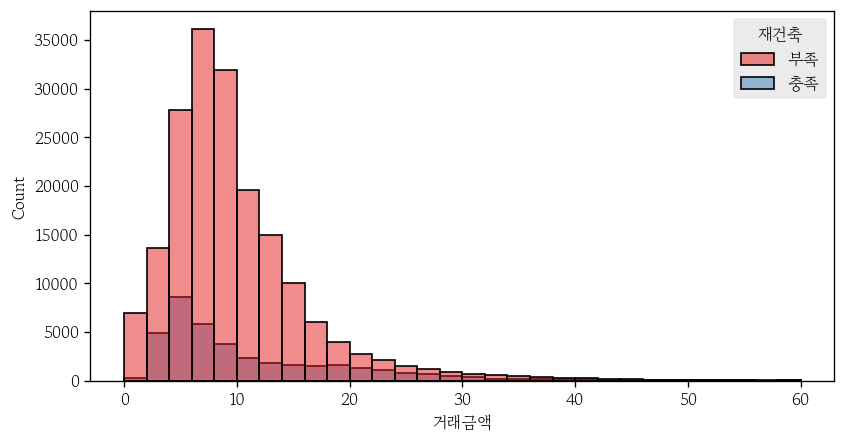

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0'
);

In [45]:
apt['재건축'].head()

0    부족
1    부족
2    충족
3    부족
4    충족
Name: 재건축, dtype: object

In [46]:
apt1 = apt.sort_values('재건축', ascending=False)

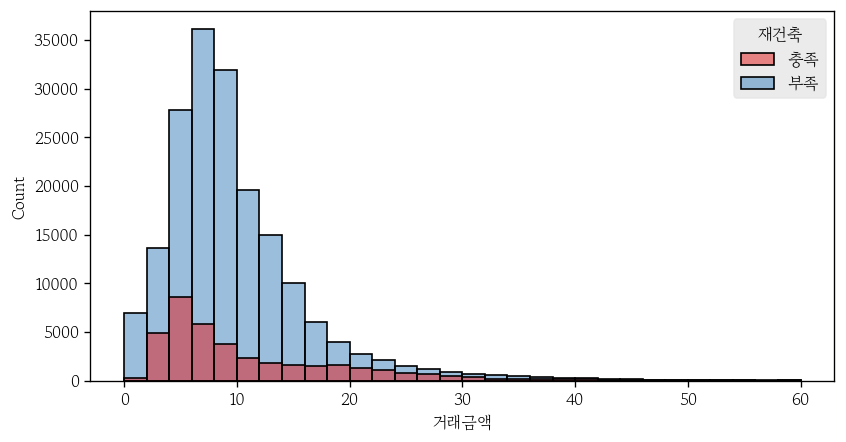

In [ ]:
sns.histplot(
    data=apt1, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0'
);

- hue_order : 범례 순서 변경

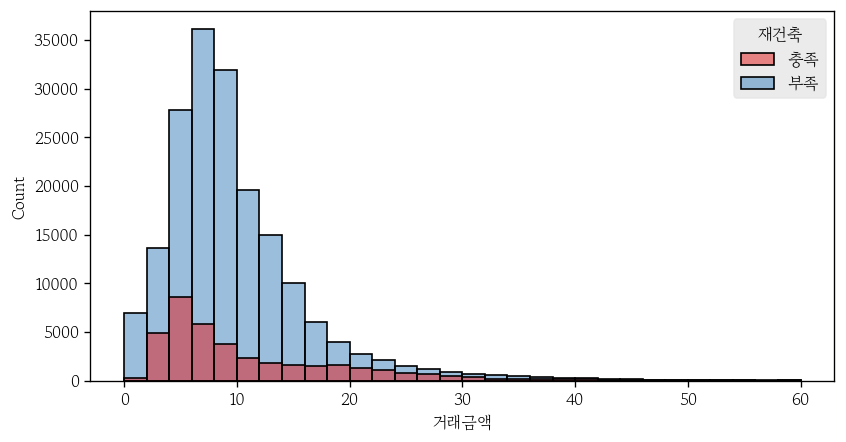

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0',
    hue_order=['충족', '부족']
);

### 사용자 팔레트 생성

In [49]:
mypal = ['lightgray', 'royalblue', 'orangered']
sns.color_palette(mypal)

[(0.8274509803921568, 0.8274509803921568, 0.8274509803921568),
 (0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
 (1.0, 0.27058823529411763, 0.0)]

/var/folders/s9/t88_hqjx117_x3pdynjz2nf00000gn/T/ipykernel_46183/3001673078.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=apt,


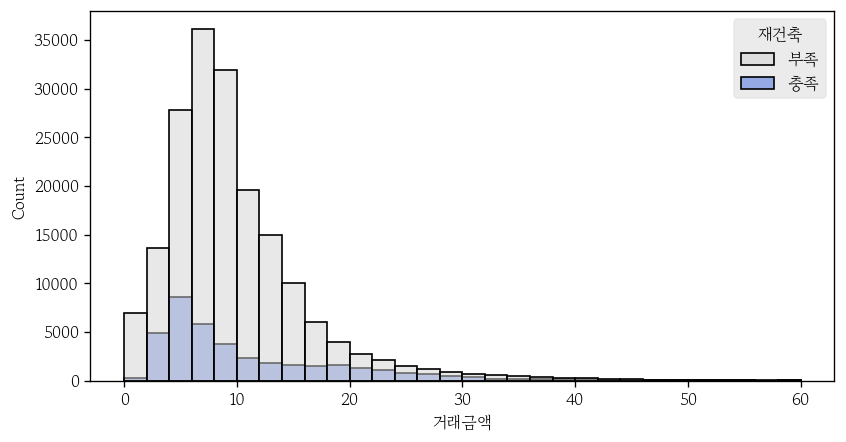

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0',
    palette=mypal
);

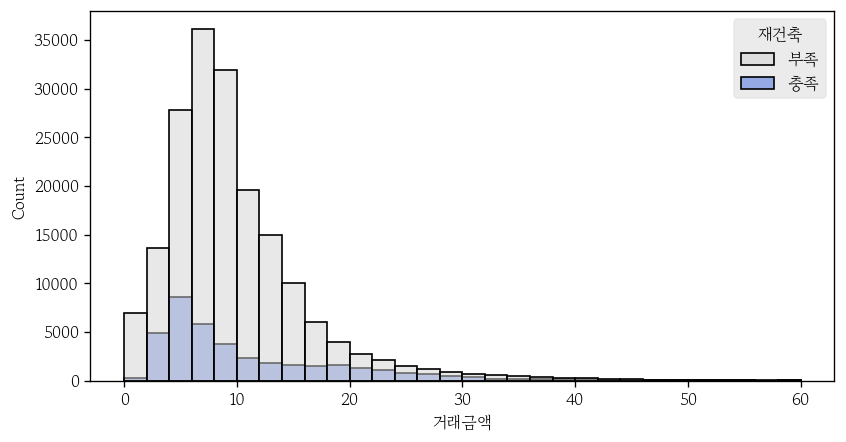

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0',
    palette={
        '부족': 'lightgray',
        '충족': 'royalblue'
    }
);

### 제목 및 축이름

/var/folders/s9/t88_hqjx117_x3pdynjz2nf00000gn/T/ipykernel_46183/2073914507.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=apt,


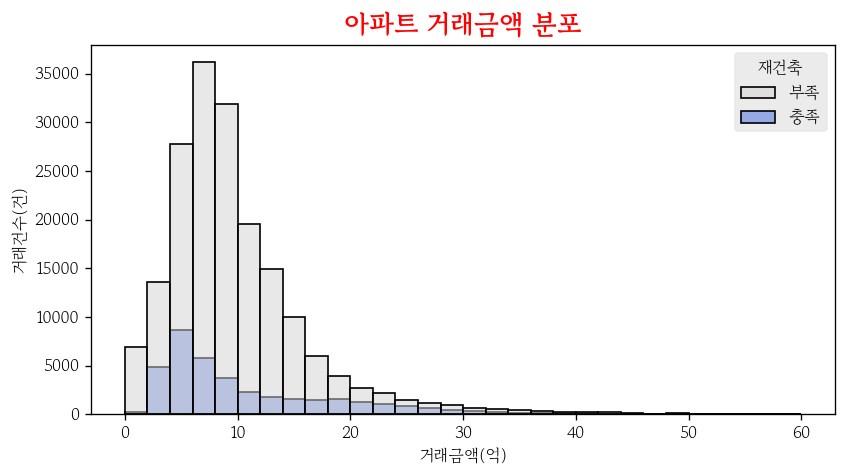

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    hue='재건축', 
    ec='0',
    palette=mypal
)

plt.title('아파트 거래금액 분포', size=16, fontweight='bold', color='red')
plt.xlabel('거래금액(억)')
plt.ylabel('거래건수(건)');

### 커널 밀도 추정 곡선 추가

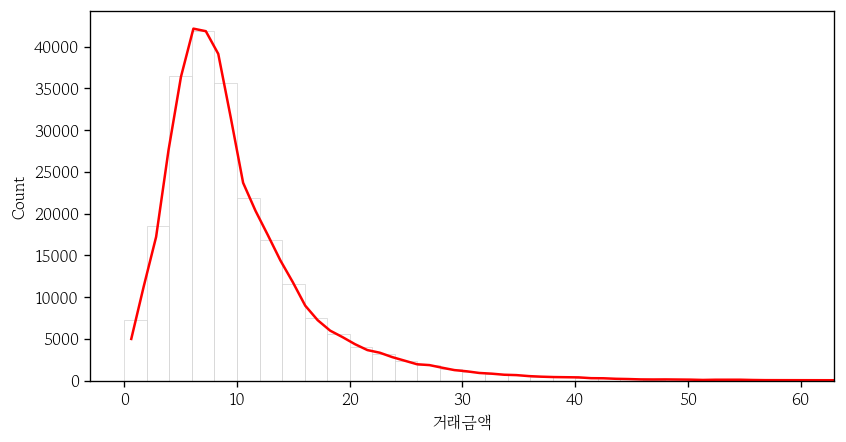

In [ ]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    fc='1',
    ec='0.8',
    kde=True,
    color='red'
)

plt.xlim(-3, 63);

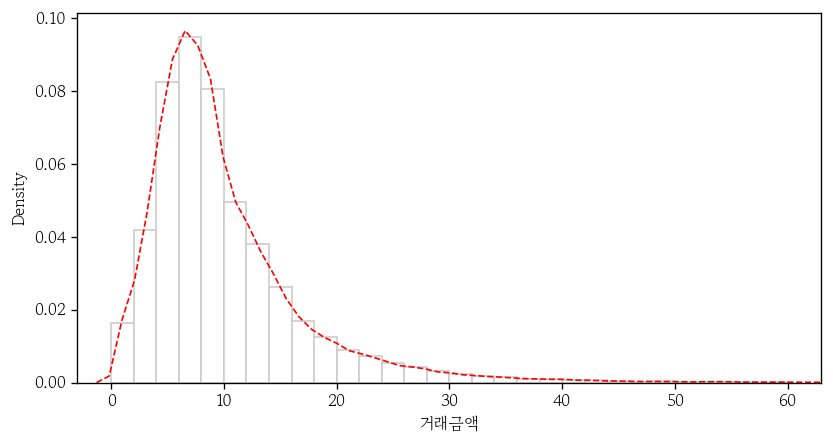

In [61]:
sns.histplot(
    data=apt, 
    x='거래금액', 
    binwidth=2,
    binrange=(0, 60),
    fc='1',
    ec='0.8',
    stat='density'
)

sns.kdeplot(
    data=apt, 
    x='거래금액',
    color='red',
    linewidth=1,
    linestyle='--'
)

plt.xlim(-3, 63);

### 관심 지역 선택

In [62]:
cond = apt['시군구'].str.contains(pat='강[남동북]구')
sub = apt.loc[cond, :]

In [63]:
sub.groupby('시군구')['거래금액'].agg(func=['count', 'mean', 'std'])

,count,mean,std
시군구,,,
강남구,12291,20.857690,12.250572
강동구,11958,9.412720,4.219959
강북구,4875,5.881168,2.092242


### 히스토그램 겹쳐서 그리기

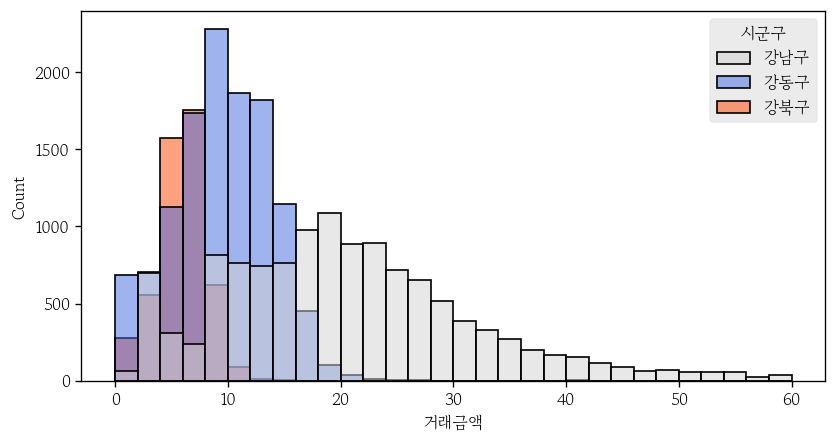

In [65]:
sns.histplot(
    data=sub,
    x='거래금액',
    binwidth=2,
    binrange=(0, 60),
    hue='시군구',
    ec='0',
    palette=mypal
);

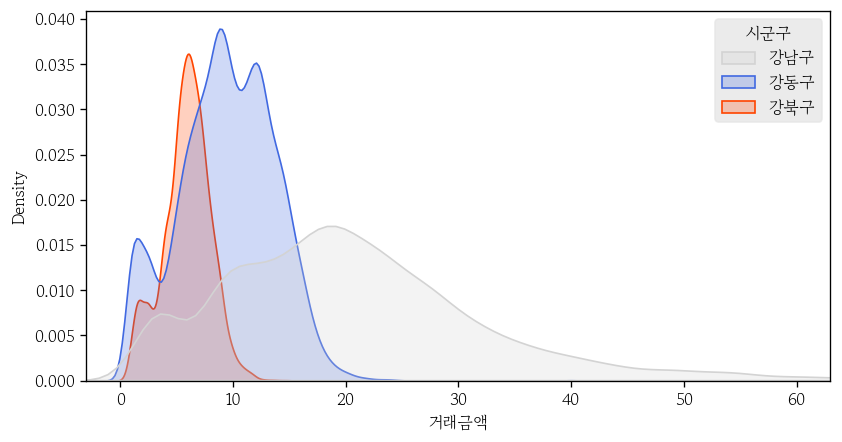

In [66]:
sns.kdeplot(
    data=sub,
    x='거래금액',
    hue='시군구',
    palette=mypal,
    fill=True
)
plt.xlim(-3, 63);

### 상자 그림

<Axes: ylabel='거래금액'>

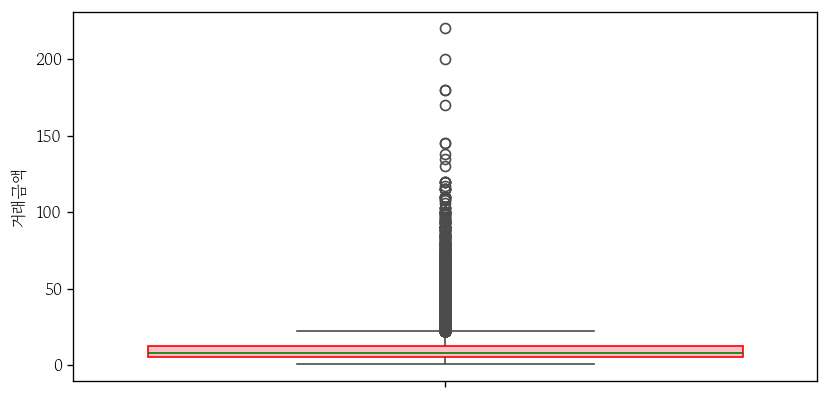

In [ ]:
sns.boxplot(
    data=apt,
    y='거래금액',
    # color='0.8',
    # linewidth=0.5
    boxprops={
        'facecolor': 'pink',
        'edgecolor': 'red'
    },
    medianprops={
        'color': 'green'
    }
);

### 이상치 관련 속성 설정

In [72]:
out_prop = {
    'marker': '*',
    'markersize': 5,
    'markeredgecolor': 'red',
    'markeredgewidth': 0.5
}

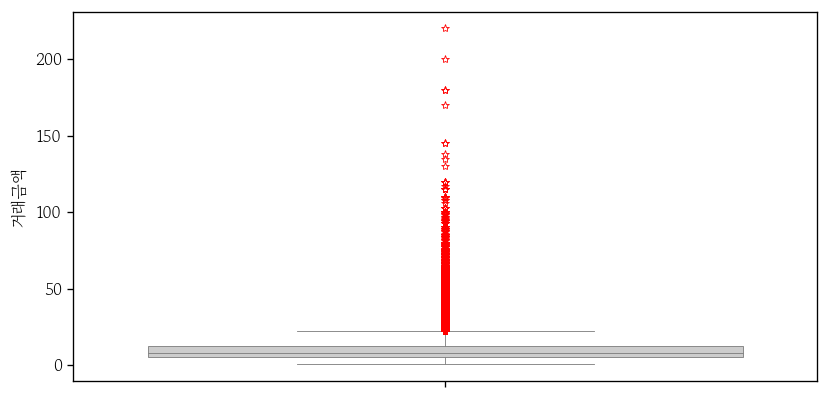

In [74]:
sns.boxplot(
    data=apt,
    y='거래금액',
    color='0.8',
    linewidth=0.5,
    flierprops=out_prop
);

### 이변량 상자 그림

- order : 범주형 정렬

In [80]:
grp = apt.groupby('시군구')['거래금액'].median().sort_values()
grp.head()

시군구
도봉구    4.9
금천구    5.4
노원구    5.5
중랑구    5.7
강북구    6.0
Name: 거래금액, dtype: float64

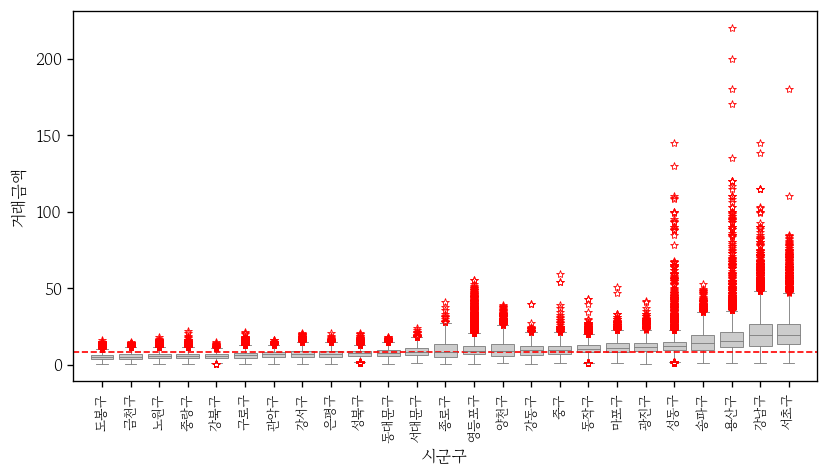

In [84]:
sns.boxplot(
    data=apt,
    x='시군구',
    y='거래금액',
    color='0.8',
    linewidth=0.5,
    flierprops=out_prop,
    order=grp.index
)

plt.axhline(y=apt['거래금액'].median(), color='red', linewidth=1, linestyle='--')

plt.xticks(size=8, rotation=90)

plt.xlim(-1, 25);

### 막대 그래프

In [90]:
grp = apt['시군구'].value_counts()

#### 특정 부분만 포인트 추가
- 사용자 팔레트를 추가하려면 hue 매개변수에 x 축 변수명을 지정해야함
- order 매개변수로 x축 눈금명 순서를 변경했다면 hue_order를 추가해야 함

In [112]:
mypal2 = ['red'] + ['silver'] * 24

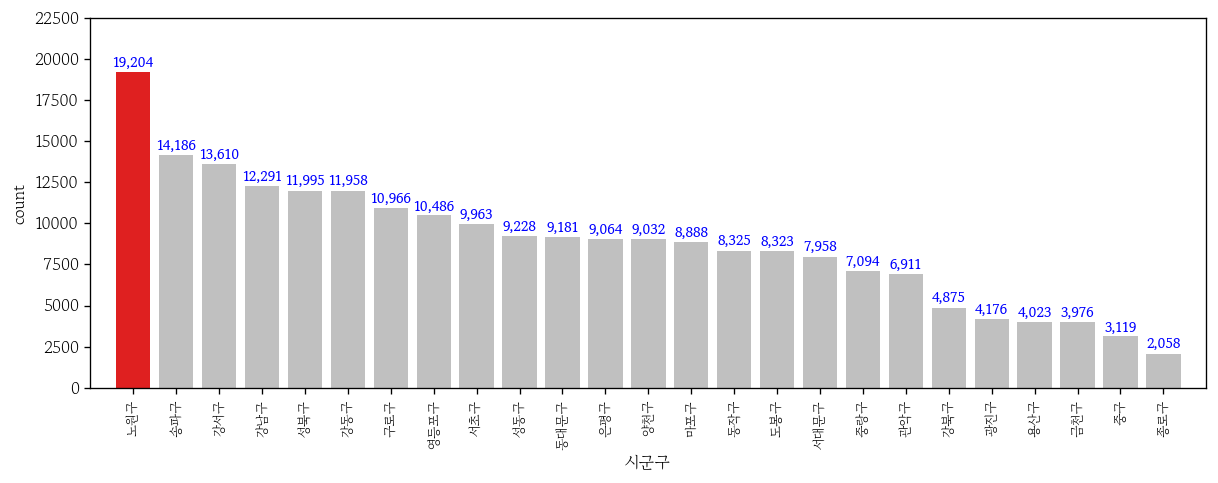

In [114]:
plt.figure(figsize=(12, 4)) # 현재 셀에만 적용되는 환경 설정 함수

sns.countplot(
    data=apt,
    x='시군구',
    color='0.8',
    order=grp.index,
    hue='시군구',
    hue_order=grp.index,
    palette=mypal2
)

# 모든 막대에 값 추가
for i, v in enumerate(grp):
    plt.text(x=i, y=v + 200, s=f'{v:,}', ha='center', va='bottom', size=8, color='blue', fontweight='bold')

plt.ylim(0, 22500)

plt.xlim(-1, 25)

plt.xticks(rotation=90, size=8);

### 가로막대 그래프 그리기

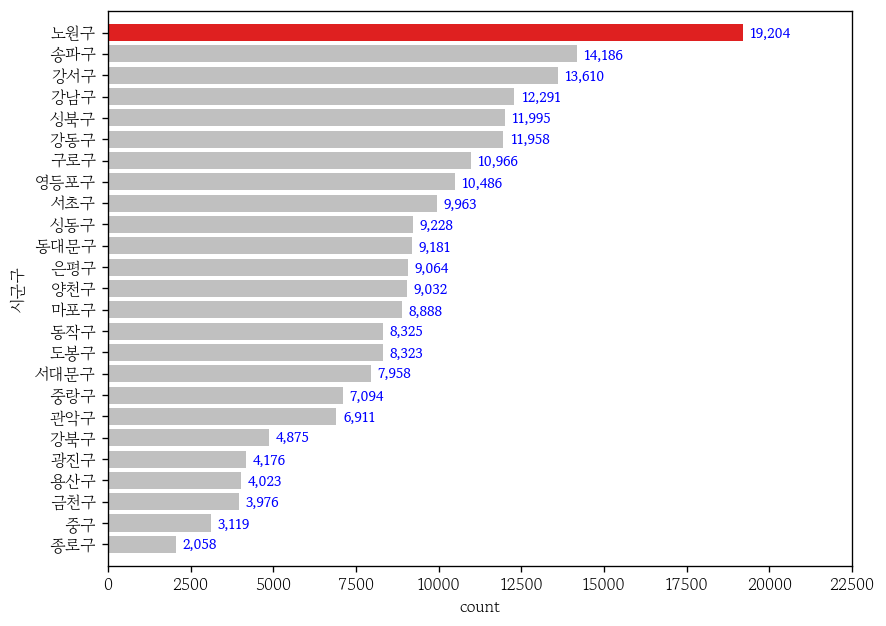

In [117]:
plt.figure(figsize=(8, 6)) 

sns.countplot(
    data=apt,
    y='시군구',
    color='0.8',
    order=grp.index,
    hue='시군구',
    hue_order=grp.index,
    palette=mypal2
)

for i, v in enumerate(grp):
    plt.text(
        x=v + 200,
        y=i,
        s=f'{v:,}',
        ha='left',
        va='center',
        color='blue',
        size=8,
        fontweight='bold'
    )

plt.ylim(25, -1)

plt.xlim(0, 22500);

In [ ]:
# 평당금액 생성
apt['평당금액'] = apt['거래금액'] / apt['전용면적'] * 3.3

### 파이차트 그리기
- 파이차트는 범주 개수가 3~5개 정도일 때 그리면 좋음

In [119]:
grp = sub['시군구'].value_counts().sort_index()
grp

시군구
강남구    12291
강동구    11958
강북구     4875
Name: count, dtype: int64

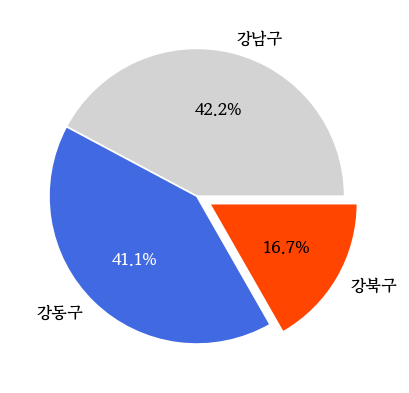

In [ ]:
_, _, pcts = plt.pie(
    x=grp,
    labels=grp.index,
    colors=mypal,
    autopct='%.1f%%',
    explode=[0, 0, 0.1], # 강조
    textprops={ # 글자 굵기 지정
        'fontweight': 'bold'
    },
    wedgeprops=dict(ec='1', lw=1) # 쐐기의 테두리 색과 선의 두께를 지정
)

pcts[1].set_color('white')

plt.show()

### 이변량 막대 그래프 그리기

In [134]:
grp = apt.groupby('시군구')['거래금액'].mean().sort_values()

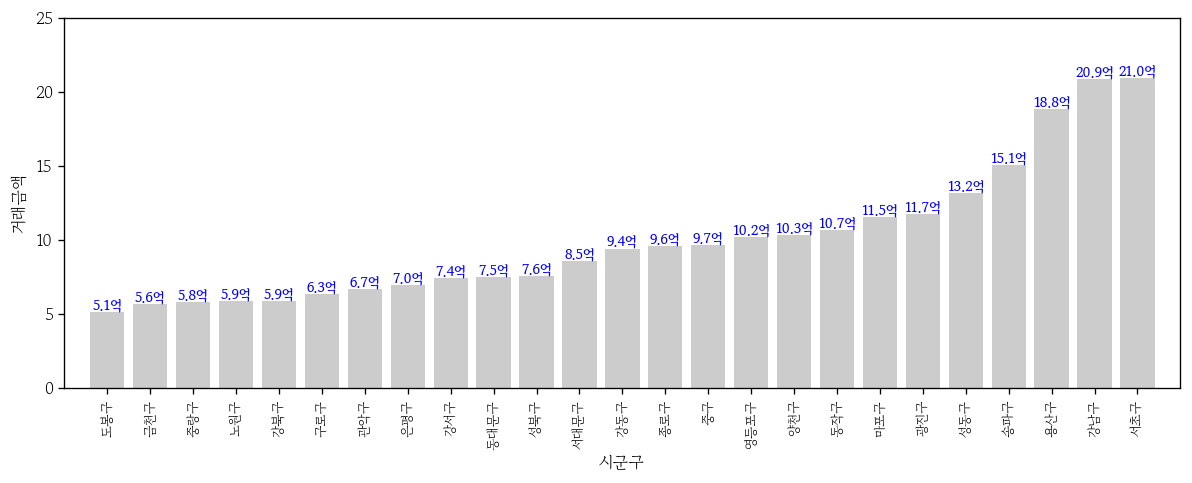

In [ ]:
plt.figure(figsize=(12, 4))

sns.barplot(
    data=apt,
    x='시군구',
    y='거래금액',
    color='0.8',
    estimator='mean', # 집계 함수 지정
    errorbar=None, # 오차막대 설정 (기본값: ('ci), 95) = 95% 신뢰구간
    order=grp.index
)

plt.xticks(rotation=90, size=8)
plt.xlim(-1, 25)
plt.ylim(0, 25)

for i, v in enumerate(grp):
    plt.text(
        x=i, y=v, s=f'{v:.1f}억',
        ha='center', va='bottom',
        color='blue', fontweight='bold', size=8
    )

plt.show()

### 이변량 막대 그래프 채우기 색 변경

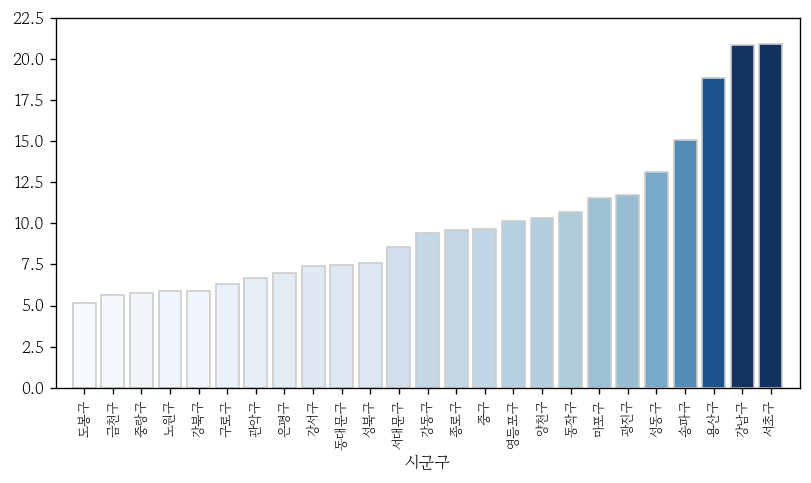

In [142]:
sns.barplot(
    x=grp.index,
    y=grp.values,
    hue=grp.values,
    palette='Blues',
    edgecolor='0.8',
    legend=False
)

plt.xticks(rotation=90, size=8)
plt.xlim(-1, 25)
plt.ylim(0, 22.5)

plt.show()

### 선 그래프
- x축에 수치형 변수를 사용하면 간격이 자동 계산 됨

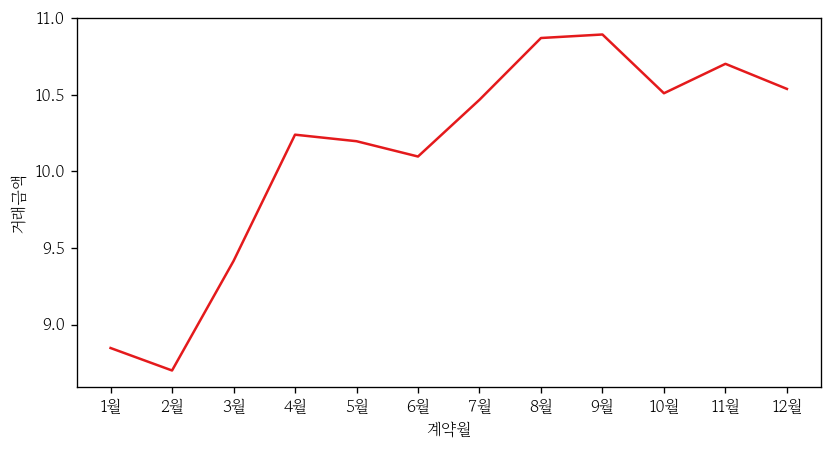

In [147]:
sns.lineplot(
    data=apt,
    x='계약월', y='거래금액',
    errorbar=None,
    estimator='mean'
)

plt.xticks(
    ticks=range(1, 13),
    labels=[f'{i}월' for i in range(1, 13)]
)

plt.show()

- 선 그래프는 order가 없어서 추가로 정렬 필요

In [150]:
apt1['계약월'] = apt1['계약월'].astype(str)
apt1 = apt1.sort_values('계약일자')

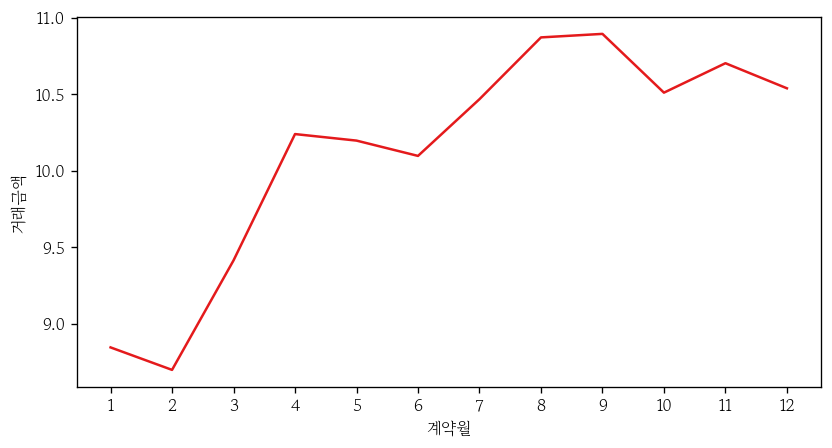

In [151]:
sns.lineplot(
    data=apt1,
    x='계약월', y='거래금액',
    errorbar=None,
    estimator='mean'
)

# plt.xticks(
#     ticks=range(1, 13),
#     labels=[f'{i}월' for i in range(1, 13)]
# )

plt.show()

### 선 그래프에 점 추가

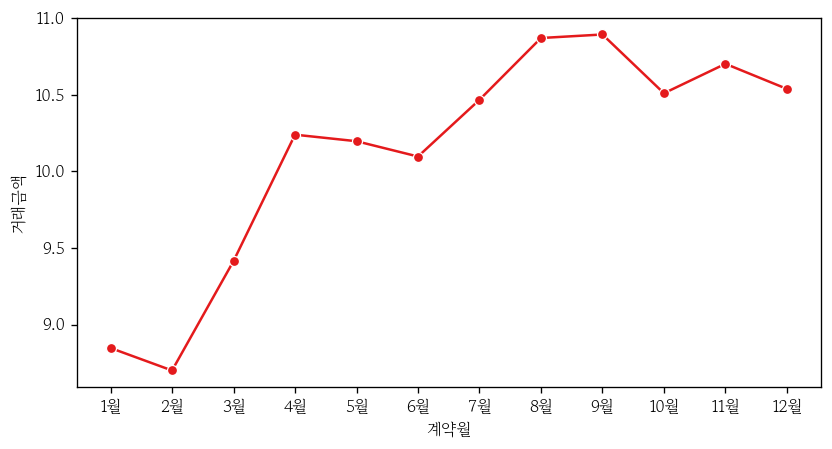

In [ ]:
sns.lineplot(
    data=apt,
    x='계약월', y='거래금액',
    errorbar=None,
    estimator='mean',
    marker='o'
)

plt.xticks(
    ticks=range(1, 13),
    labels=[f'{i}월' for i in range(1, 13)]
)

plt.show()

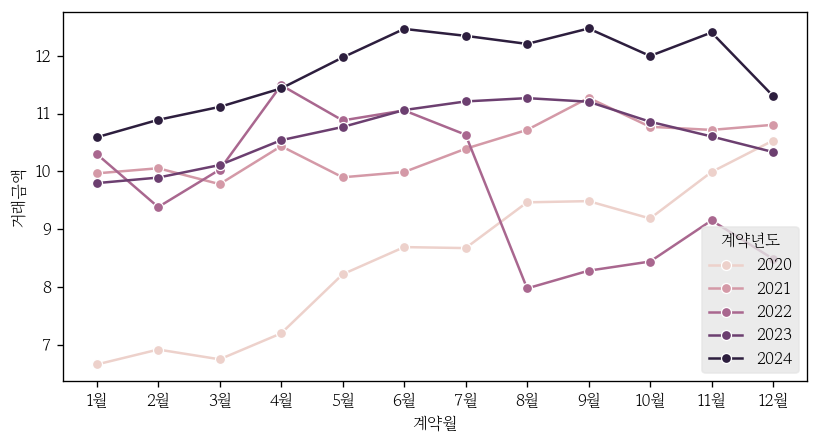

In [155]:
sns.lineplot(
    data=apt,
    x='계약월', y='거래금액', hue='계약년도',
    errorbar=None,
    estimator='mean',
    marker='o'
)

plt.xticks(
    ticks=range(1, 13),
    labels=[f'{i}월' for i in range(1, 13)]
)

plt.show()

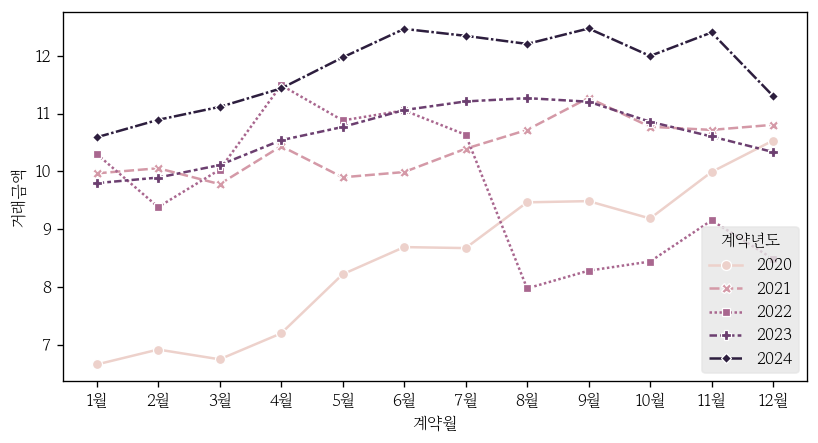

In [ ]:
sns.lineplot(
    data=apt,
    x='계약월', y='거래금액', hue='계약년도',
    errorbar=None,
    estimator='mean',
    style='계약년도', markers=True, dashes=True # 지정한 범주별 마커와 선 모양 다르게
)

plt.xticks(
    ticks=range(1, 13),
    labels=[f'{i}월' for i in range(1, 13)]
)

plt.show()

### 범례 위치 지정

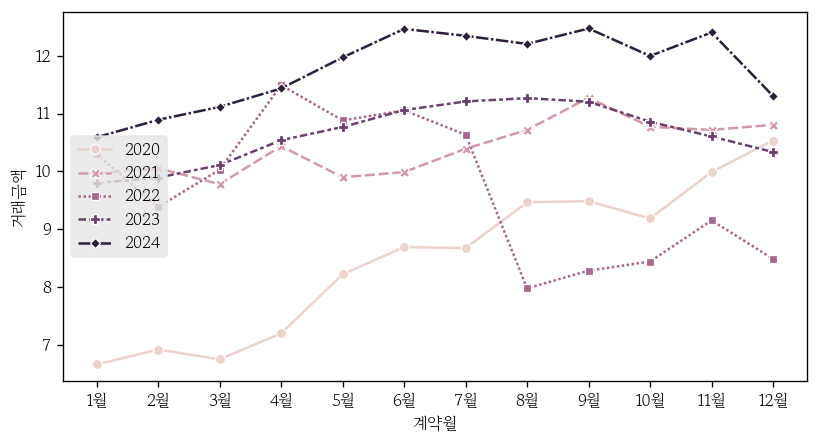

In [158]:
sns.lineplot(
    data=apt,
    x='계약월', y='거래금액', hue='계약년도',
    errorbar=None,
    estimator='mean',
    style='계약년도', markers=True, dashes=True
)

plt.xticks(
    ticks=range(1, 13),
    labels=[f'{i}월' for i in range(1, 13)]
)

plt.legend(
    loc='center left'
)

plt.show()

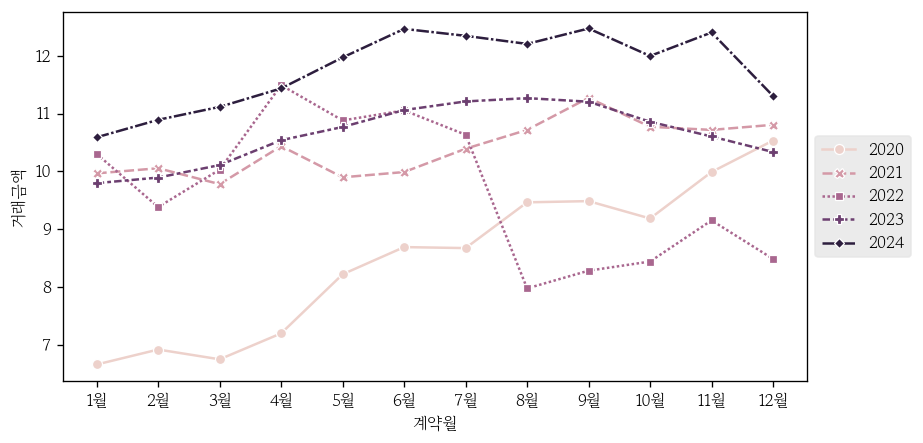

In [159]:
sns.lineplot(
    data=apt,
    x='계약월', y='거래금액', hue='계약년도',
    errorbar=None,
    estimator='mean',
    style='계약년도', markers=True, dashes=True
)

plt.xticks(
    ticks=range(1, 13),
    labels=[f'{i}월' for i in range(1, 13)]
)

plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.show()

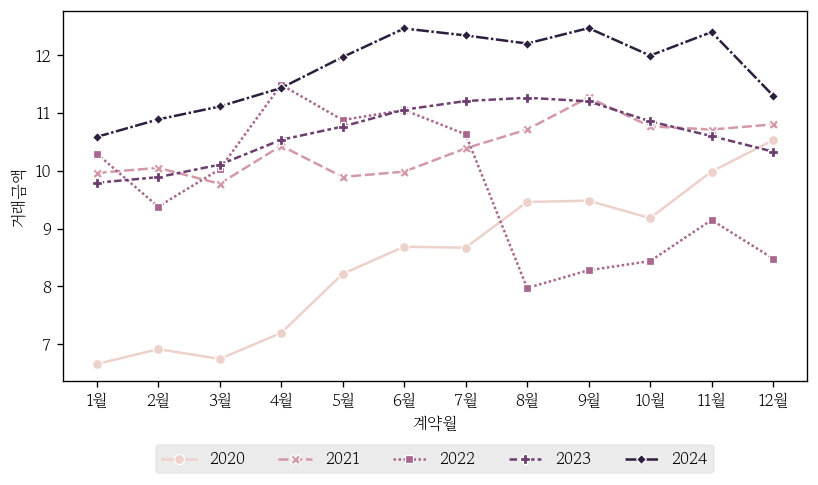

In [160]:
sns.lineplot(
    data=apt,
    x='계약월', y='거래금액', hue='계약년도',
    errorbar=None,
    estimator='mean',
    style='계약년도', markers=True, dashes=True
)

plt.xticks(
    ticks=range(1, 13),
    labels=[f'{i}월' for i in range(1, 13)]
)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=5
)

plt.show()

### 산점도

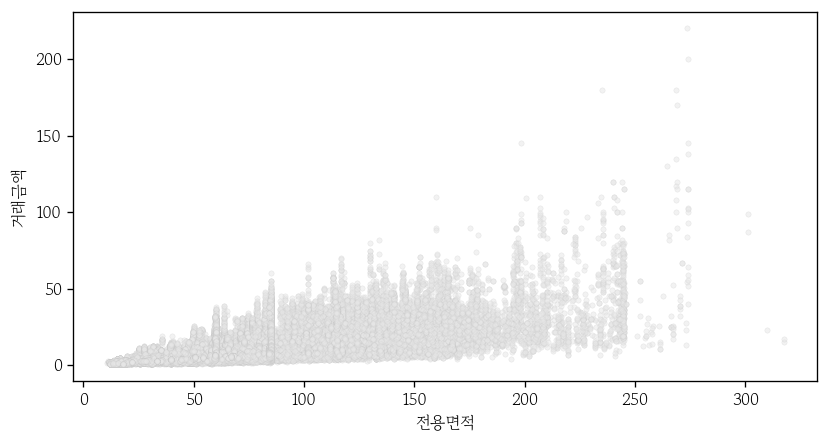

In [ ]:
sns.scatterplot(
    data=apt,
    x='전용면적', y='거래금액',
    fc='0.9', 
    ec='0.8', 
    s=10, # 점의 크기
    alpha=0.5 # 투명도
)

plt.show()

In [164]:
apt = apt.sort_values('세대수')

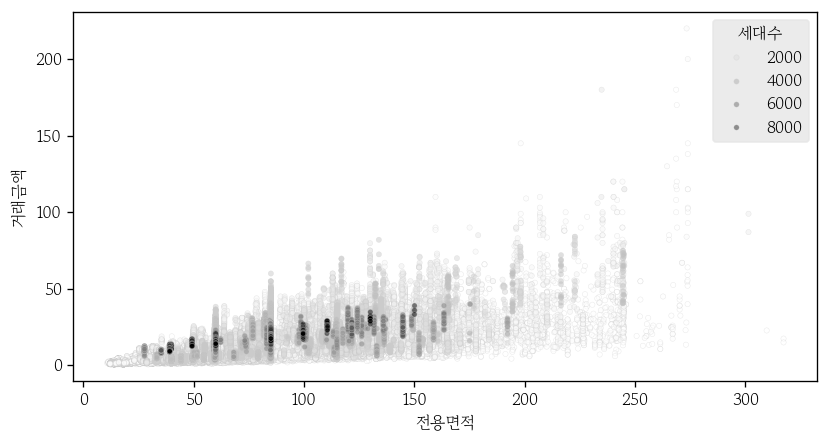

In [165]:
sns.scatterplot(
    data=apt,
    x='전용면적', y='거래금액',
    hue='세대수', 
    palette='Greys',
    ec='0.8', 
    s=10,
    alpha=0.5
)

plt.show()

In [166]:
cond = apt['시군구'].eq('강남구')
gng = apt.loc[cond, :]

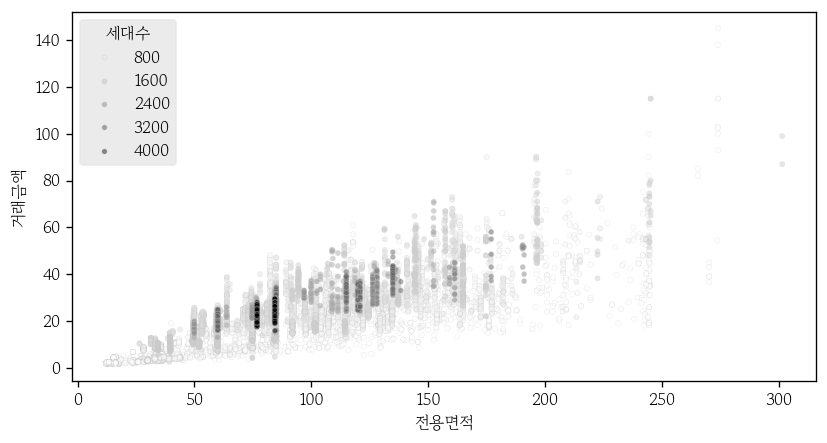

In [167]:
sns.scatterplot(
    data=gng,
    x='전용면적', y='거래금액',
    hue='세대수', 
    palette='Greys',
    ec='0.8', 
    s=10,
    alpha=0.5
)

plt.show()

### 산점도에 회귀직선 추가

In [170]:
point_prop = dict(fc='0.9', ec='0.8', s=10, alpha=0.5)
line_prop = dict(color='red', lw=1.5)

<Axes: xlabel='전용면적', ylabel='거래금액'>

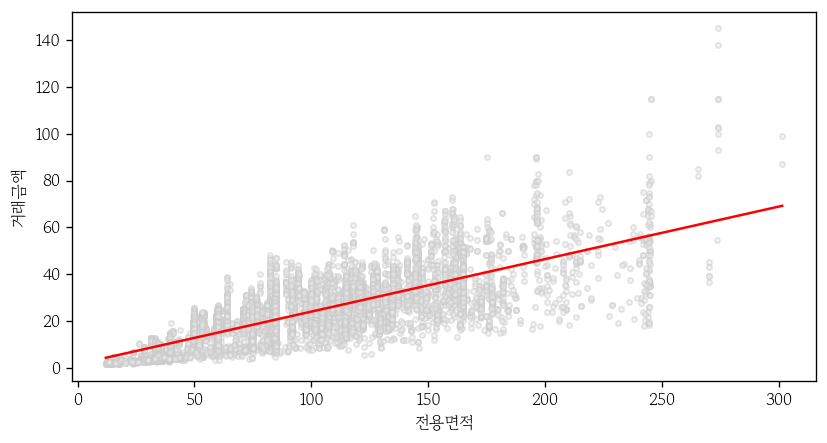

In [171]:
sns.regplot(
    data=gng,
    x='전용면적', y='거래금액',
    ci=None,
    scatter_kws=point_prop,
    line_kws=line_prop
)